<a href="https://colab.research.google.com/github/Dr-Mamiz/Projects-Data-Analysis/blob/main/London_housing_dataset_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#              ***London housing dataset***
                 (A part of Big Data Analysis) 
###   **TASK #3**
 For an investors, it is necessary to conduct a market analysis, identify the patterns that determine the success of rent/sell houses, determine a user profile for each of the regions, and test working hypotheses. This will allow you to bet on a potentially popular product and plan advertising campaigns to help develop the company's business.
Questions are given in the project and then solved with the help of Python. 

Q. 1) Convert the Datatype of 'Date' column to Date-Time format.
Q. 2) Add a new column ''year'' in the dataframe, which contains years only.(B.2) Add a new column ''month'' as 2nd column in the dataframe, which contains month only.
Q. 4) Show all the records where 'No. of Crimes' is 0. And, how many such records are there ?
Q. 5) What is the maximum & minimum 'average_price' per year in england ?
Q. 6) What is the Maximum & Minimum No. of Crimes recorded per area ?
Q. 7) Show the total count of records of each area, where average price is less than 100000.
II) Visualisation


In [1]:
# Importe packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [4]:
# Import dataset
data_housing= pd.read_csv('/5. London Housing Data.csv')


In [5]:
# Copy of our dataset
df=data_housing.copy()

In [6]:
# Basic information about our dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13549 entries, 0 to 13548
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           13549 non-null  object 
 1   area           13549 non-null  object 
 2   average_price  13549 non-null  int64  
 3   code           13549 non-null  object 
 4   houses_sold    13455 non-null  float64
 5   no_of_crimes   7439 non-null   float64
dtypes: float64(2), int64(1), object(3)
memory usage: 635.2+ KB


In [7]:
# Dataset SHAPE
df.shape

(13549, 6)

In [8]:
#Analysing our dataset
df.isnull().sum()

date                0
area                0
average_price       0
code                0
houses_sold        94
no_of_crimes     6110
dtype: int64

In [9]:
#Analysing our dataset
df.dtypes


date              object
area              object
average_price      int64
code              object
houses_sold      float64
no_of_crimes     float64
dtype: object

In [10]:
df.head(3)

,date,area,average_price,code,houses_sold,no_of_crimes
0,1/1/1995,city of london,91449,E09000001,17.0,NaN
1,2/1/1995,city of london,82203,E09000001,7.0,NaN
2,3/1/1995,city of london,79121,E09000001,14.0,NaN


In [11]:
#Analysing our dataset
df['no_of_crimes'].nunique()



2669

In [12]:
df['code'].nunique()


45

In [13]:
df['area'].nunique()

45

In [14]:
# Checking if we have any weird values
df.describe()

,average_price,houses_sold,no_of_crimes
count,1.354900e+04,13455.000000,7439.000000
mean,2.635197e+05,3893.994129,2158.352063
std,1.876175e+05,12114.402476,902.087742
min,4.072200e+04,2.000000,0.000000
25%,1.323800e+05,247.000000,1623.000000
50%,2.229190e+05,371.000000,2132.000000
75%,3.368430e+05,3146.000000,2582.000000
max,1.463378e+06,132163.000000,7461.000000


In [15]:
# I-Data cleaning / Data cleansing
df.isnull().sum()

date                0
area                0
average_price       0
code                0
houses_sold        94
no_of_crimes     6110
dtype: int64

In [16]:

# **commentary 1** NaN in the column 'no_of_crimes' it means that no crime was registrated in that period = 0 crimes
# **commentary 2** For our column 'houses_sold' we've 94 nan values, since our Dataset SHAPE (13549, 6) so I'll drop the nan

df.dropna(subset = ['houses_sold'], inplace=True)

In [17]:
df.isnull().sum()

date                0
area                0
average_price       0
code                0
houses_sold         0
no_of_crimes     6080
dtype: int64

In [18]:
# Convert all non-numeric values in 'no_of_crimes' to 0, since NaN means no registrataion for any crime.
df['no_of_crimes'] = pd.to_numeric(df['no_of_crimes'], errors='coerce').fillna(0)


In [19]:
df.isnull().sum()

date             0
area             0
average_price    0
code             0
houses_sold      0
no_of_crimes     0
dtype: int64

In [20]:
#Q. 1) Convert the Datatype of 'Date' column to Date-Time format

df['date']=pd.to_datetime(df['date'])

In [21]:
df.dtypes

date             datetime64[ns]
area                     object
average_price             int64
code                     object
houses_sold             float64
no_of_crimes            float64
dtype: object

In [22]:
# 2) Add a new column ''year'' in the dataframe, which contains years only.

df['year']=pd.to_datetime(df['date']).dt.year

In [23]:
df.head(3)

,date,area,average_price,code,houses_sold,no_of_crimes,year
0,1995-01-01,city of london,91449,E09000001,17.0,0.0,1995
1,1995-02-01,city of london,82203,E09000001,7.0,0.0,1995
2,1995-03-01,city of london,79121,E09000001,14.0,0.0,1995


In [24]:
# (B.2) Add a new column ''month'' as 2nd column in the dataframe, which contains month only

df.insert ( 1  , " Month", pd.to_datetime(df['date']).dt.month)


In [25]:
df.head(3)

,date,Month,area,average_price,code,houses_sold,no_of_crimes,year
0,1995-01-01,1,city of london,91449,E09000001,17.0,0.0,1995
1,1995-02-01,2,city of london,82203,E09000001,7.0,0.0,1995
2,1995-03-01,3,city of london,79121,E09000001,14.0,0.0,1995


In [26]:
 #  4) Show all the records where 'No. of Crimes' is 0. And, how many such records are there ? 

 df[df['no_of_crimes'].isin([0])]

,date,Month,area,average_price,code,houses_sold,no_of_crimes,year
0,1995-01-01,1,city of london,91449,E09000001,17.0,0.0,1995
1,1995-02-01,2,city of london,82203,E09000001,7.0,0.0,1995
2,1995-03-01,3,city of london,79121,E09000001,14.0,0.0,1995
3,1995-04-01,4,city of london,77101,E09000001,7.0,0.0,1995
4,1995-05-01,5,city of london,84409,E09000001,10.0,0.0,1995
...,...,...,...,...,...,...,...,...
13542,2019-07-01,7,england,248562,E92000001,70681.0,0.0,2019
13543,2019-08-01,8,england,249432,E92000001,75079.0,0.0,2019
13544,2019-09-01,9,england,249942,E92000001,64605.0,0.0,2019
13545,2019-10-01,10,england,249376,E92000001,68677.0,0.0,2019


In [27]:
df.groupby('no_of_crimes').size()


no_of_crimes
0.0       6184
3.0          1
5.0          1
7.0          3
8.0          1
          ... 
7069.0       1
7076.0       1
7208.0       1
7215.0       1
7227.0       1
Length: 2658, dtype: int64

In [28]:
 len(df[df['no_of_crimes'].isin([0])])

6184

In [29]:
# 5) What is the maximum & minimum 'average_price' per year in england ? 

df.tail()

,date,Month,area,average_price,code,houses_sold,no_of_crimes,year
13542,2019-07-01,7,england,248562,E92000001,70681.0,0.0,2019
13543,2019-08-01,8,england,249432,E92000001,75079.0,0.0,2019
13544,2019-09-01,9,england,249942,E92000001,64605.0,0.0,2019
13545,2019-10-01,10,england,249376,E92000001,68677.0,0.0,2019
13546,2019-11-01,11,england,248515,E92000001,67814.0,0.0,2019


In [30]:
df1 = df[df.area == 'england']

In [31]:
df1['average_price'].mean()

152427.94983277592

In [32]:
df1.head()

,date,Month,area,average_price,code,houses_sold,no_of_crimes,year
13248,1995-01-01,1,england,53203,E92000001,47639.0,0.0,1995
13249,1995-02-01,2,england,53096,E92000001,47880.0,0.0,1995
13250,1995-03-01,3,england,53201,E92000001,67025.0,0.0,1995
13251,1995-04-01,4,england,53591,E92000001,56925.0,0.0,1995
13252,1995-05-01,5,england,53678,E92000001,64192.0,0.0,1995


In [33]:
df1.groupby(['year'])['average_price'].max()

year
1995     53901
1996     55755
1997     61564
1998     65743
1999     75071
2000     84191
2001     95992
2002    119982
2003    138985
2004    160330
2005    167244
2006    182031
2007    194764
2008    191750
2009    174136
2010    180807
2011    177335
2012    180129
2013    188544
2014    203639
2015    219582
2016    231922
2017    242628
2018    248620
2019    249942
Name: average_price, dtype: int64

In [34]:
df1.groupby(['year'])['average_price'].min()

year
1995     52788
1996     52333
1997     55789
1998     61659
1999     65522
2000     75219
2001     84245
2002     96215
2003    121610
2004    139719
2005    158572
2006    166544
2007    181824
2008    165795
2009    159340
2010    174458
2011    173046
2012    174161
2013    176816
2014    188265
2015    202856
2016    220361
2017    231593
2018    240428
2019    243281
Name: average_price, dtype: int64

In [35]:
#6) What is the Maximum & Minimum No. of Crimes recorded per area ?

df.groupby(['area'])['no_of_crimes'].max().sort_values(ascending= True)


area
yorks and the humber         0.0
london                       0.0
north east                   0.0
england                      0.0
north west                   0.0
east of england              0.0
outer london                 0.0
east midlands                0.0
south east                   0.0
south west                   0.0
west midlands                0.0
inner london                 0.0
city of london              10.0
kingston upon thames      1379.0
sutton                    1425.0
richmond upon thames      1551.0
merton                    1623.0
harrow                    1763.0
bexley                    1914.0
havering                  1956.0
barking and dagenham      2049.0
redbridge                 2560.0
bromley                   2637.0
hammersmith and fulham    2645.0
kensington and chelsea    2778.0
enfield                   2798.0
lewisham                  2813.0
hounslow                  2817.0
hillingdon                2819.0
greenwich                 2853.0
barne

In [36]:
df.groupby(['area'])['no_of_crimes'].min()


area
barking and dagenham      0.0
barnet                    0.0
bexley                    0.0
brent                     0.0
bromley                   0.0
camden                    0.0
city of london            0.0
croydon                   0.0
ealing                    0.0
east midlands             0.0
east of england           0.0
enfield                   0.0
england                   0.0
greenwich                 0.0
hackney                   0.0
hammersmith and fulham    0.0
haringey                  0.0
harrow                    0.0
havering                  0.0
hillingdon                0.0
hounslow                  0.0
inner london              0.0
islington                 0.0
kensington and chelsea    0.0
kingston upon thames      0.0
lambeth                   0.0
lewisham                  0.0
london                    0.0
merton                    0.0
newham                    0.0
north east                0.0
north west                0.0
outer london              0.0
redbr

In [47]:
#7) Show the total count of records of each area, where average price is less than 100000.
df[df['average_price']< 100000].area.value_counts()


north east              112
north west              111
yorks and the humber    110
east midlands            96
west midlands            94
england                  87
barking and dagenham     85
south west               78
east of england          76
newham                   72
bexley                   64
waltham forest           64
lewisham                 62
havering                 60
greenwich                59
south east               58
croydon                  57
sutton                   54
enfield                  53
redbridge                52
hackney                  52
southwark                48
outer london             46
tower hamlets            46
hillingdon               44
hounslow                 41
lambeth                  41
brent                    40
london                   39
merton                   35
bromley                  33
haringey                 33
inner london             31
ealing                   31
kingston upon thames     30
harrow              

In [38]:
# Visualisation
df.head(5)

,date,Month,area,average_price,code,houses_sold,no_of_crimes,year
0,1995-01-01,1,city of london,91449,E09000001,17.0,0.0,1995
1,1995-02-01,2,city of london,82203,E09000001,7.0,0.0,1995
2,1995-03-01,3,city of london,79121,E09000001,14.0,0.0,1995
3,1995-04-01,4,city of london,77101,E09000001,7.0,0.0,1995
4,1995-05-01,5,city of london,84409,E09000001,10.0,0.0,1995


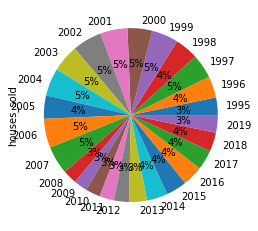

In [39]:
# Visualisation: PIE representing the % of mean'houses_sold' per year (from the 2001 to 2019)

df.groupby(['year'])['houses_sold'].mean().plot.pie(autopct='%0.f%%')

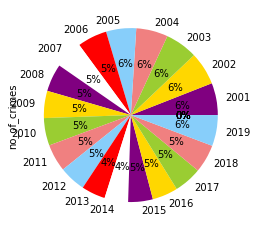

In [40]:
# Visualisation: PIE representing the % of mean 'no_of_crimes' per year (from the 2001 to 2019)

colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue', 'red','white','purple']
df.groupby(['year'])['no_of_crimes'].mean().plot.pie(autopct='%0.f%%',colors = colors)



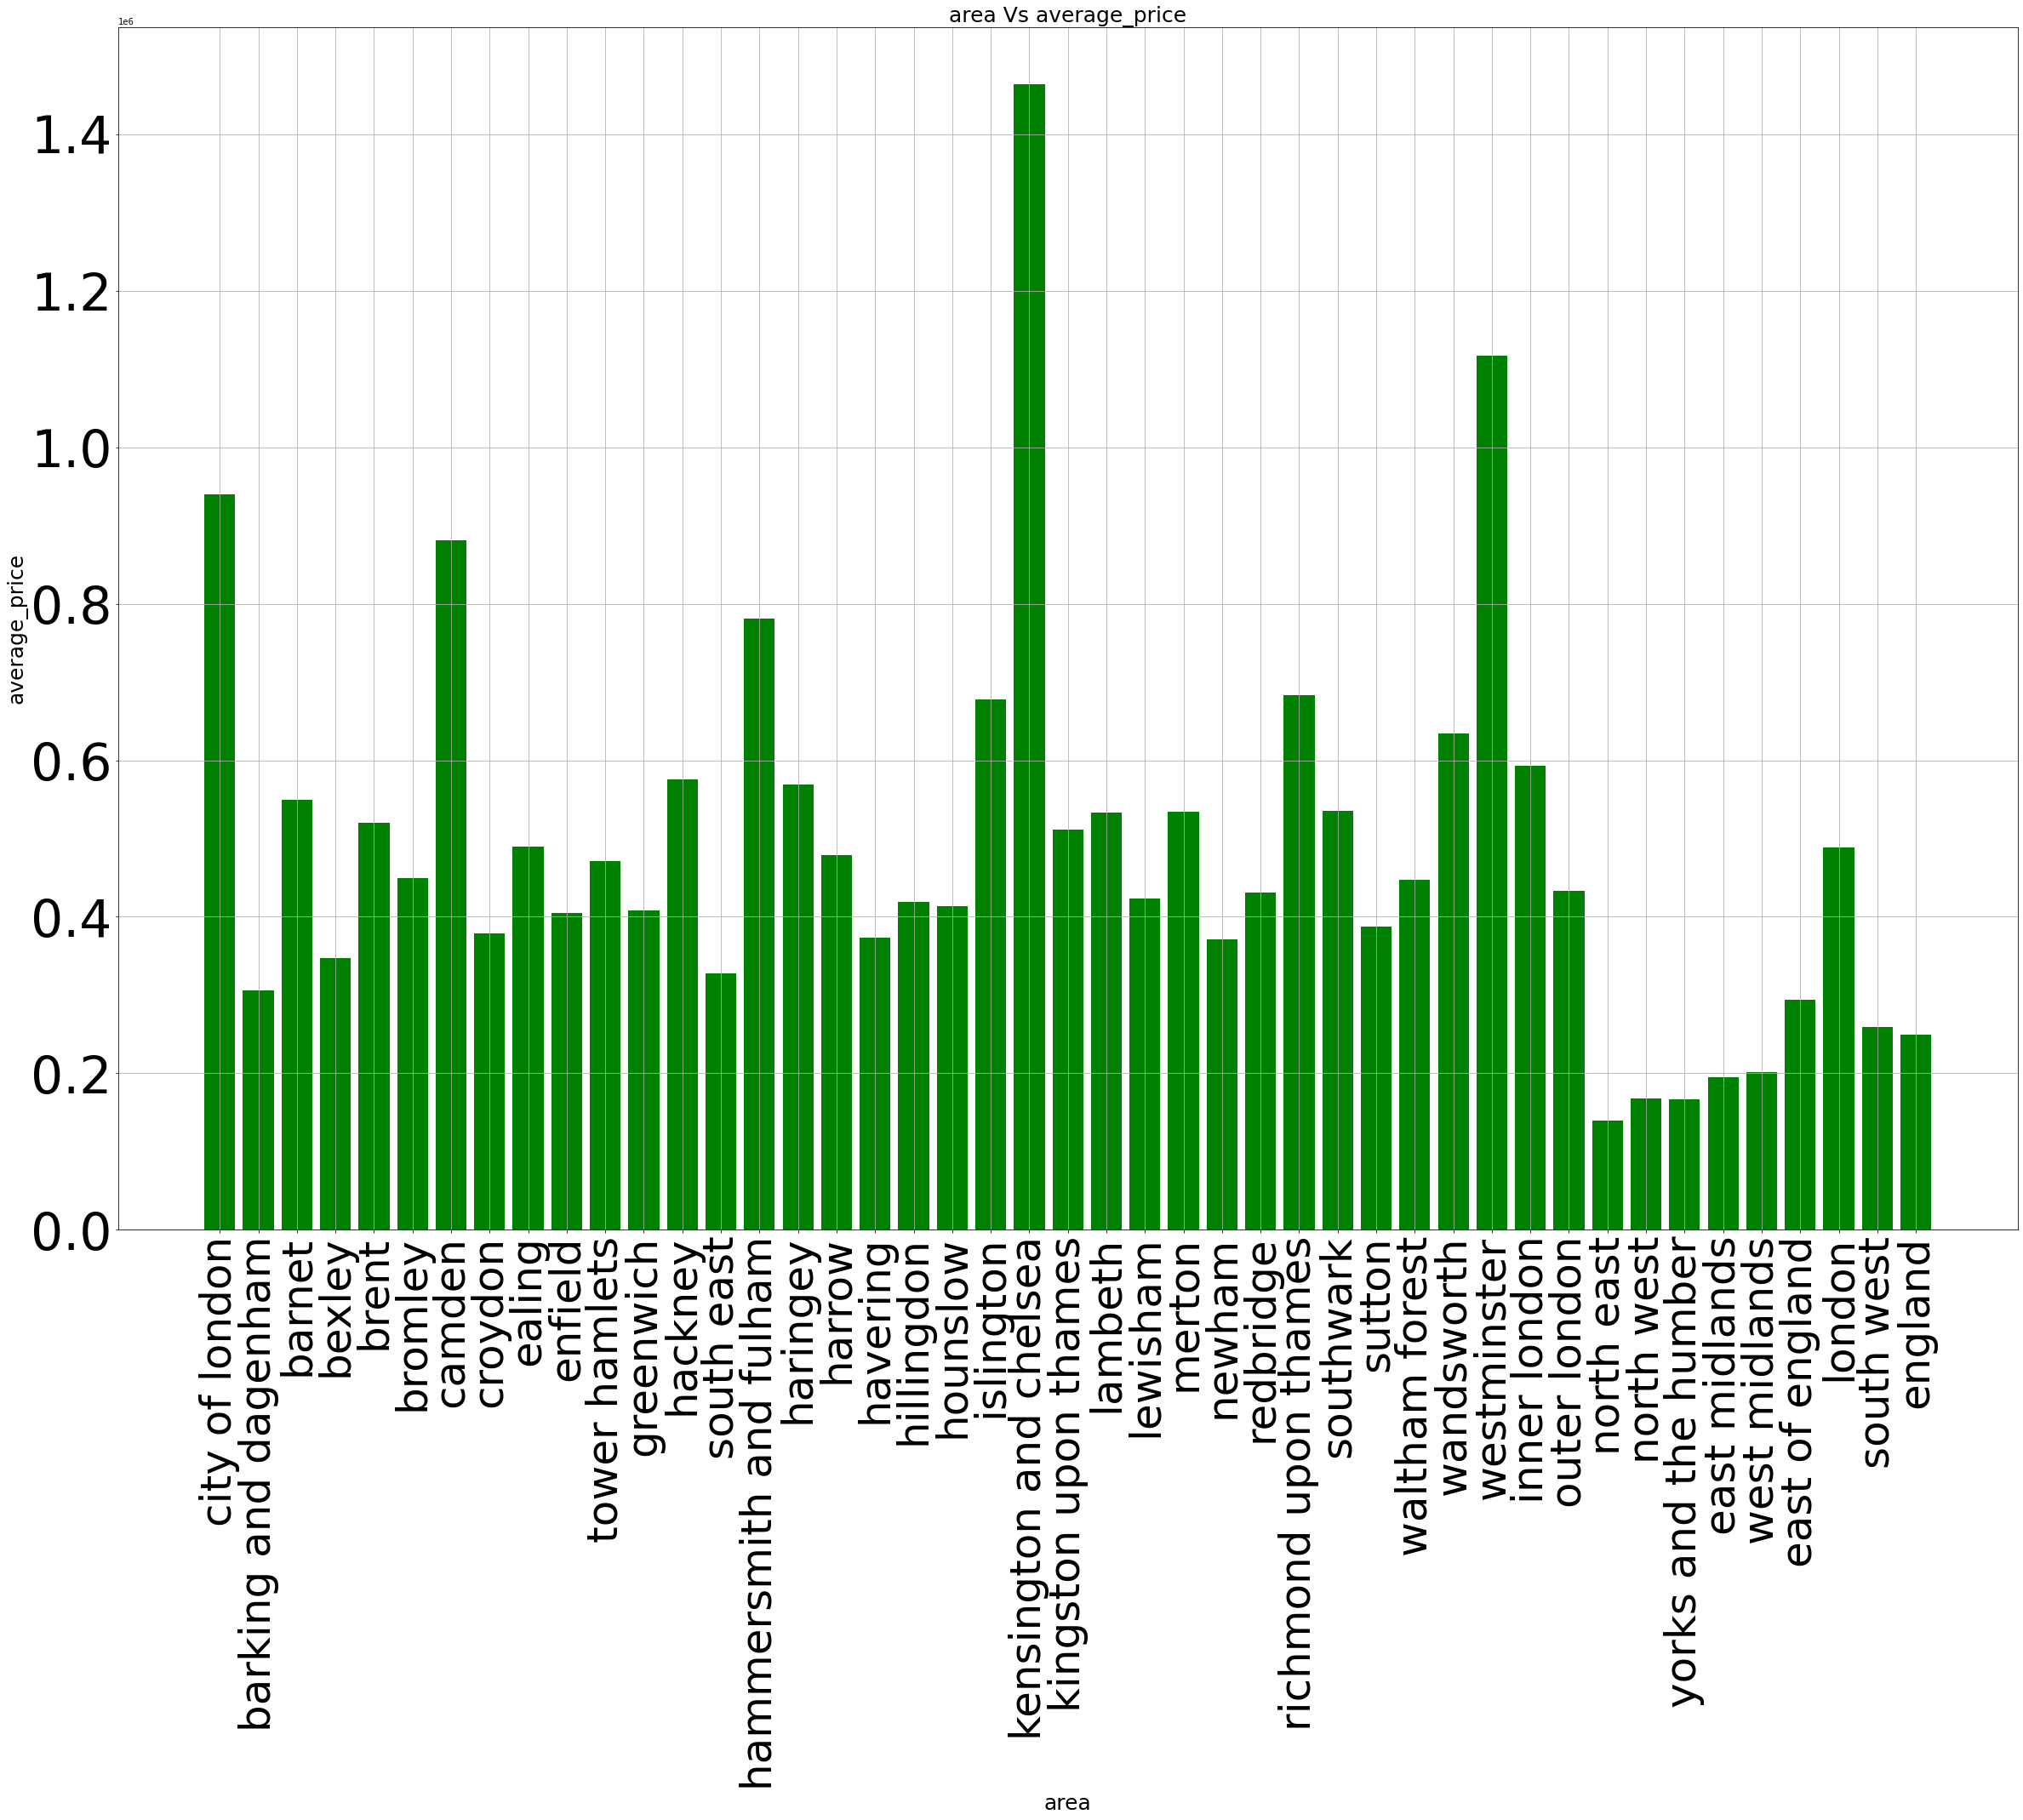

In [42]:
# Visualisation: (BAR GRAPHES) area Vs average_price

plt.bar(df['area'], df['average_price'], color='g')
plt.title('area Vs average_price', fontsize=25)
plt.rcParams['figure.figsize']=(40,26)
plt.xlabel('area', fontsize=25)
plt.ylabel('average_price', fontsize=25)
plt.xticks(size = 50)
plt.yticks(size = 60)
plt.xticks(rotation='vertical')
plt.grid(True)
plt.show()

From the graph we can see that the 1st place for  highest price is the area of Kensington and thames, then City of London, Bromley, Hammersmith and Fulham, Islington, Richmond upon thames, Wandsworth and Inner London they took the 2nd place.

That could mean that in that areas a high demand for housing

(array([       0.,  5000000., 10000000., 15000000., 20000000., 25000000.]),
 <a list of 6 Text major ticklabel objects>)

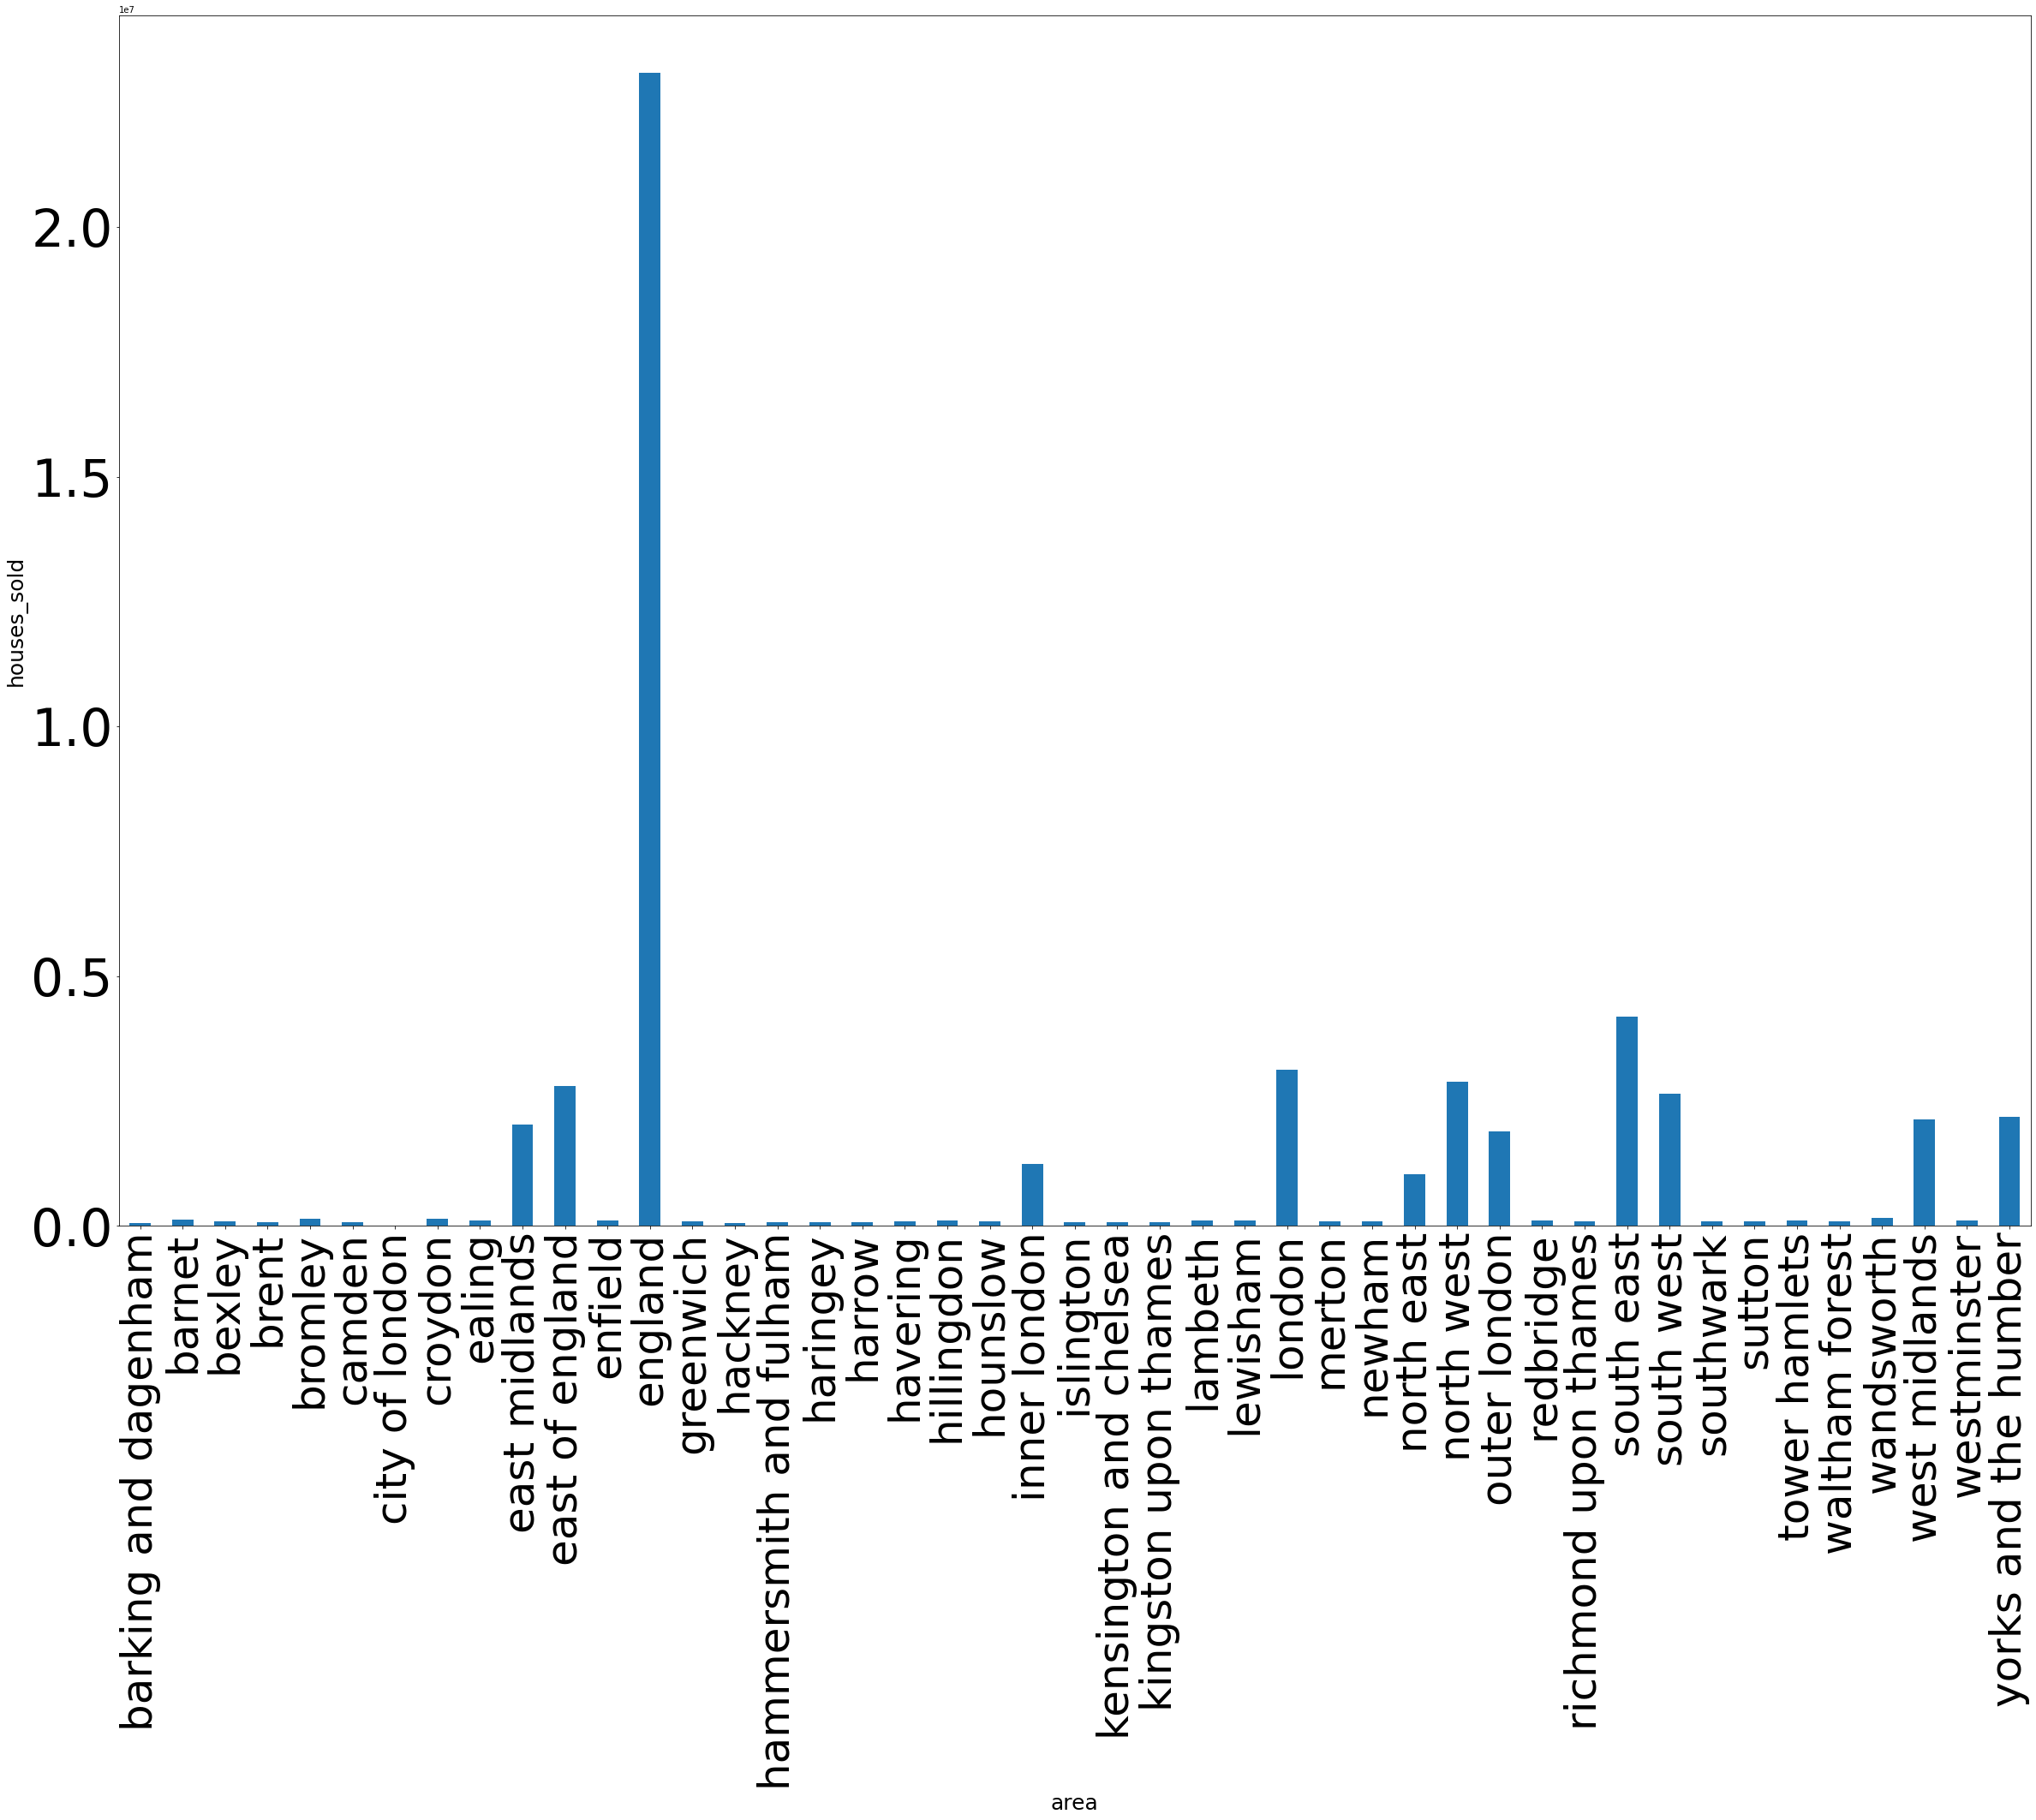

In [60]:
# Visualisation: (BAR GRAPHES) showing which city has achieved more sales
df.groupby('area')['houses_sold'].sum().plot(kind='bar')
plt.xlabel('area', fontsize=25)
plt.ylabel('houses_sold', fontsize=25)
plt.xticks(size = 50)
plt.yticks(size = 60)

the city of England is by far the best, as she has exploded the sales records

(array([      0.,  500000., 1000000., 1500000., 2000000., 2500000.,
        3000000., 3500000.]), <a list of 8 Text major ticklabel objects>)

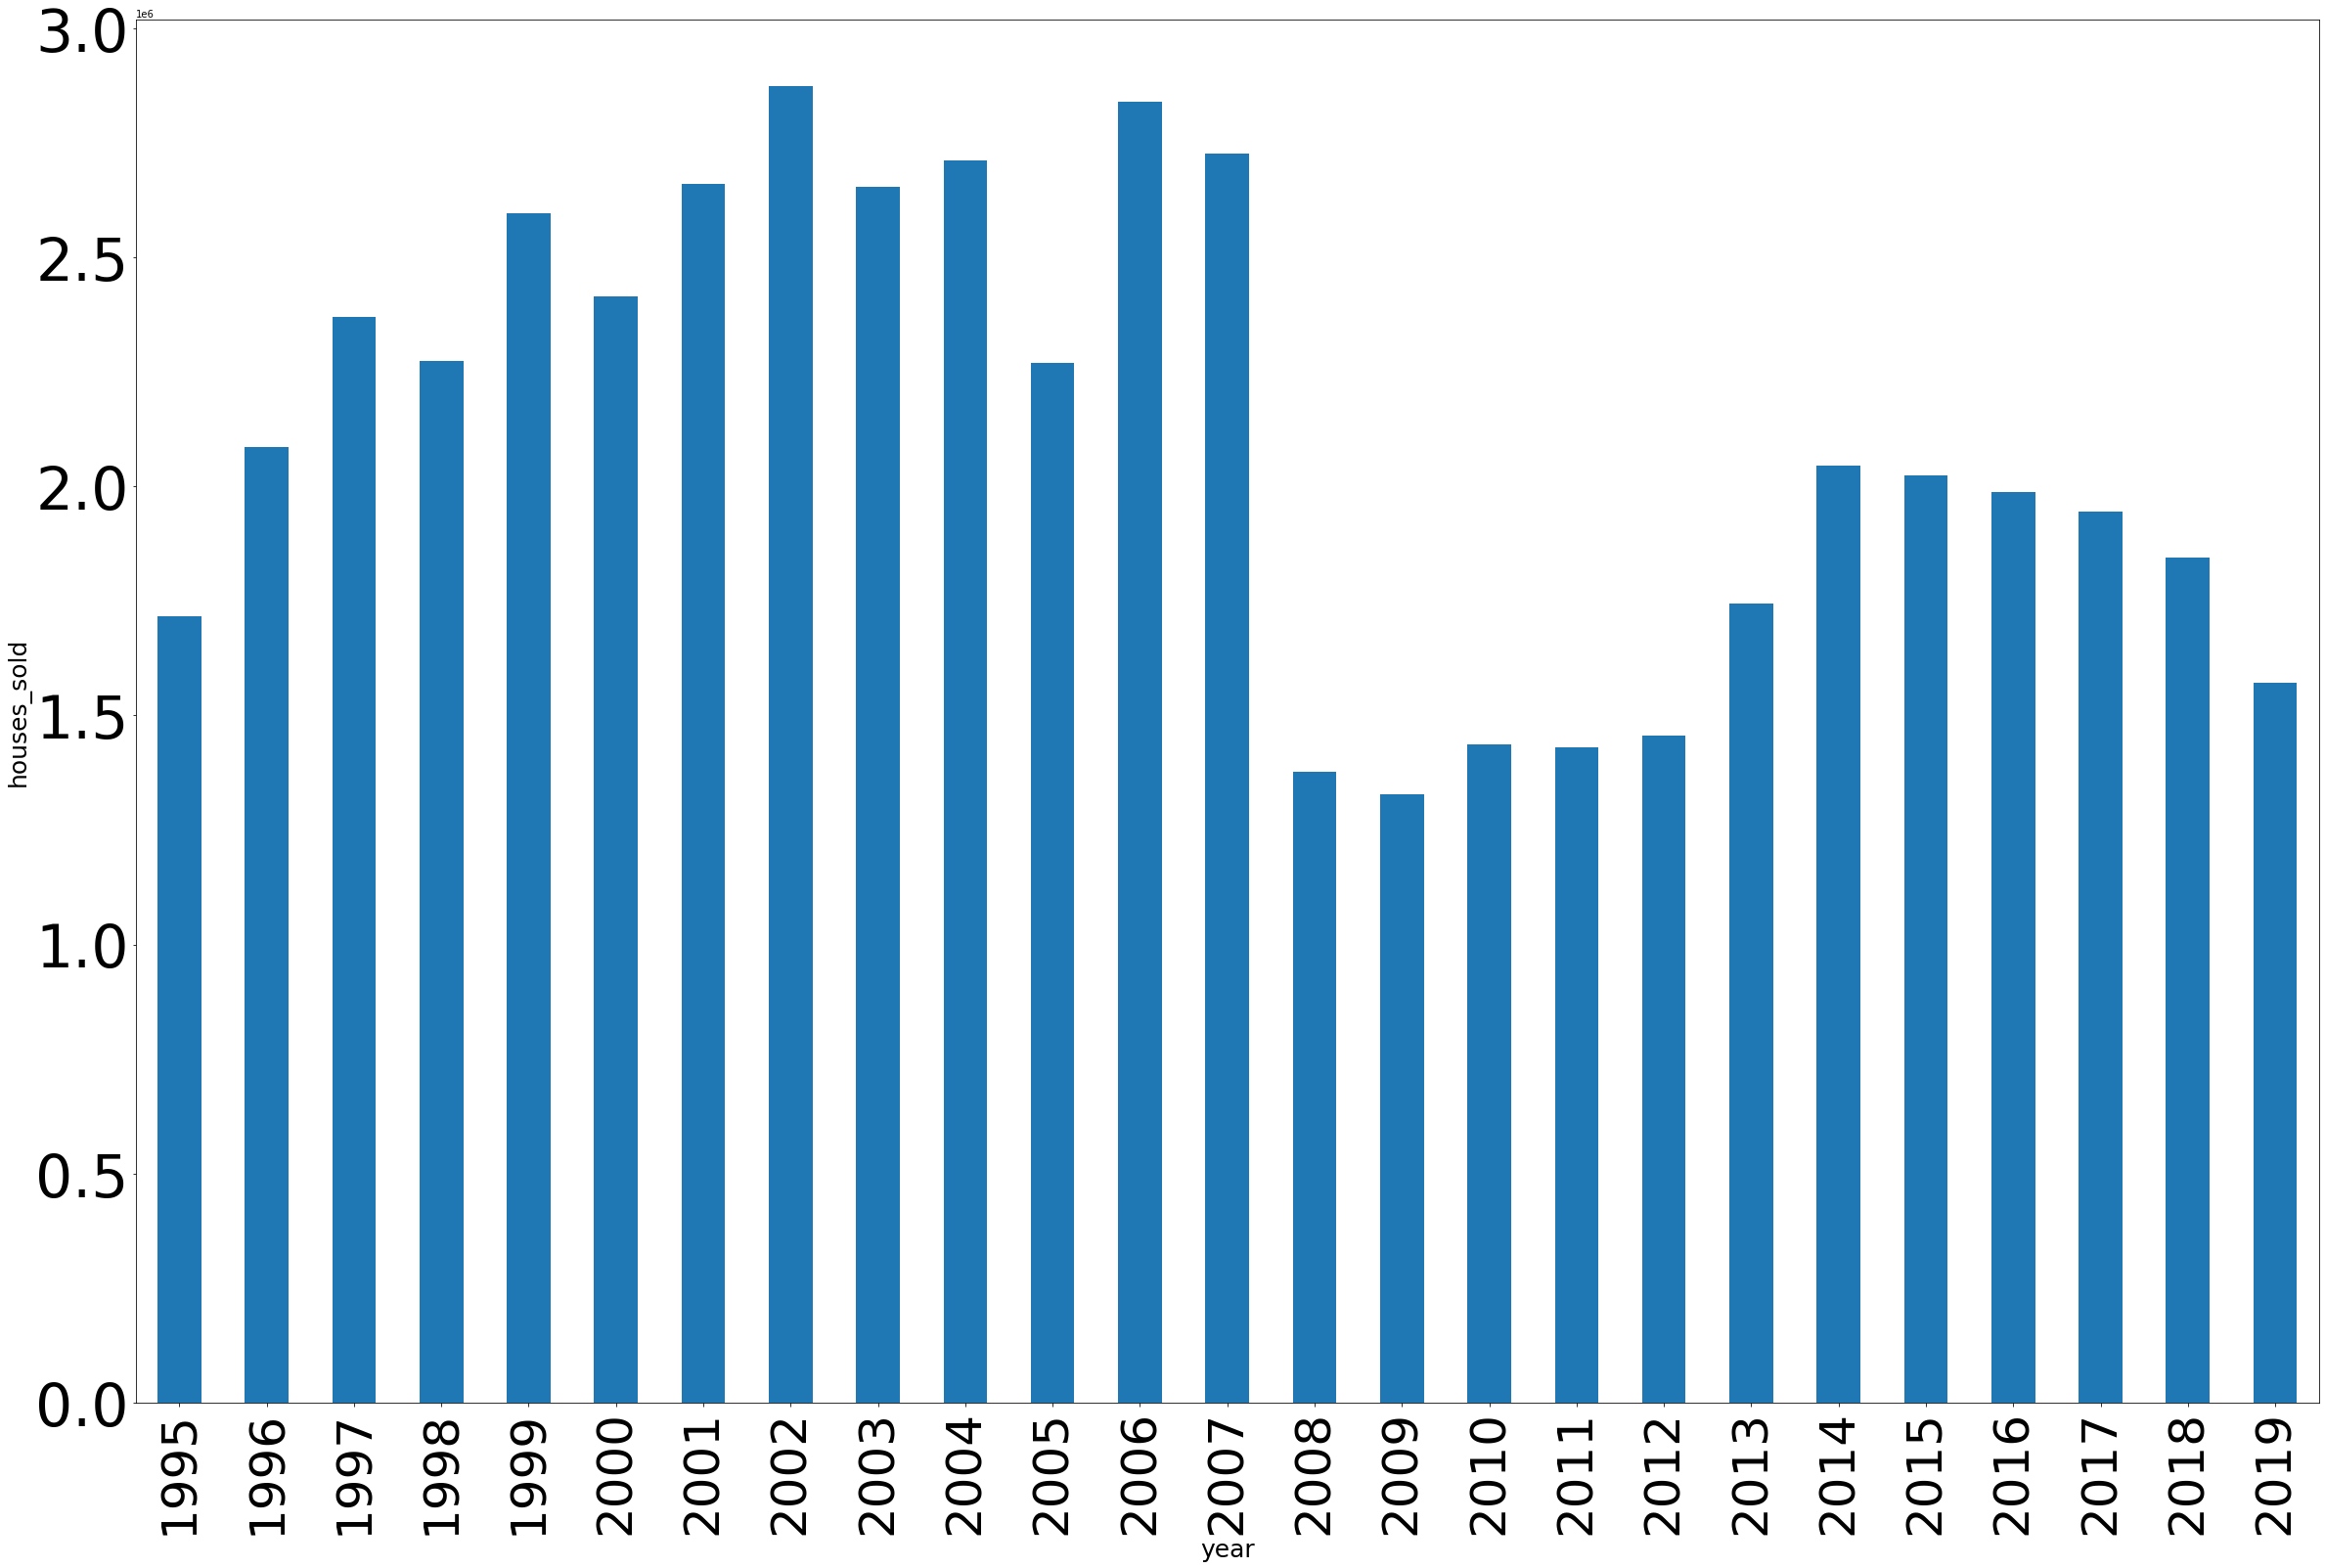

In [59]:
# Visualisation: (BAR GRAPHES) comparing the number of houses_sold	per year from 2001-2019

df.groupby('year')['houses_sold'].sum().plot(kind='bar')
plt.xlabel('year', fontsize=25)
plt.ylabel('houses_sold', fontsize=25)
plt.xticks(size = 50)
plt.yticks(size = 60)


From 1995 to 2007 the number of houses was increasing then decrease on 2008 (because of the economic crisis) then a slight increase between 2013-2019

In [55]:
df.head(1)

,date,Month,area,average_price,code,houses_sold,no_of_crimes,year,Month
0,1995-01-01,1,city of london,91449,E09000001,17.0,0.0,1995,1


In [54]:
df['Month']=pd.to_datetime(df['date']).dt.month
df.head(3)

,date,Month,area,average_price,code,houses_sold,no_of_crimes,year,Month
0,1995-01-01,1,city of london,91449,E09000001,17.0,0.0,1995,1
1,1995-02-01,2,city of london,82203,E09000001,7.0,0.0,1995,2
2,1995-03-01,3,city of london,79121,E09000001,14.0,0.0,1995,3


(array([      0.,  200000.,  400000.,  600000.,  800000., 1000000.,
        1200000., 1400000., 1600000.]),
 <a list of 9 Text major ticklabel objects>)

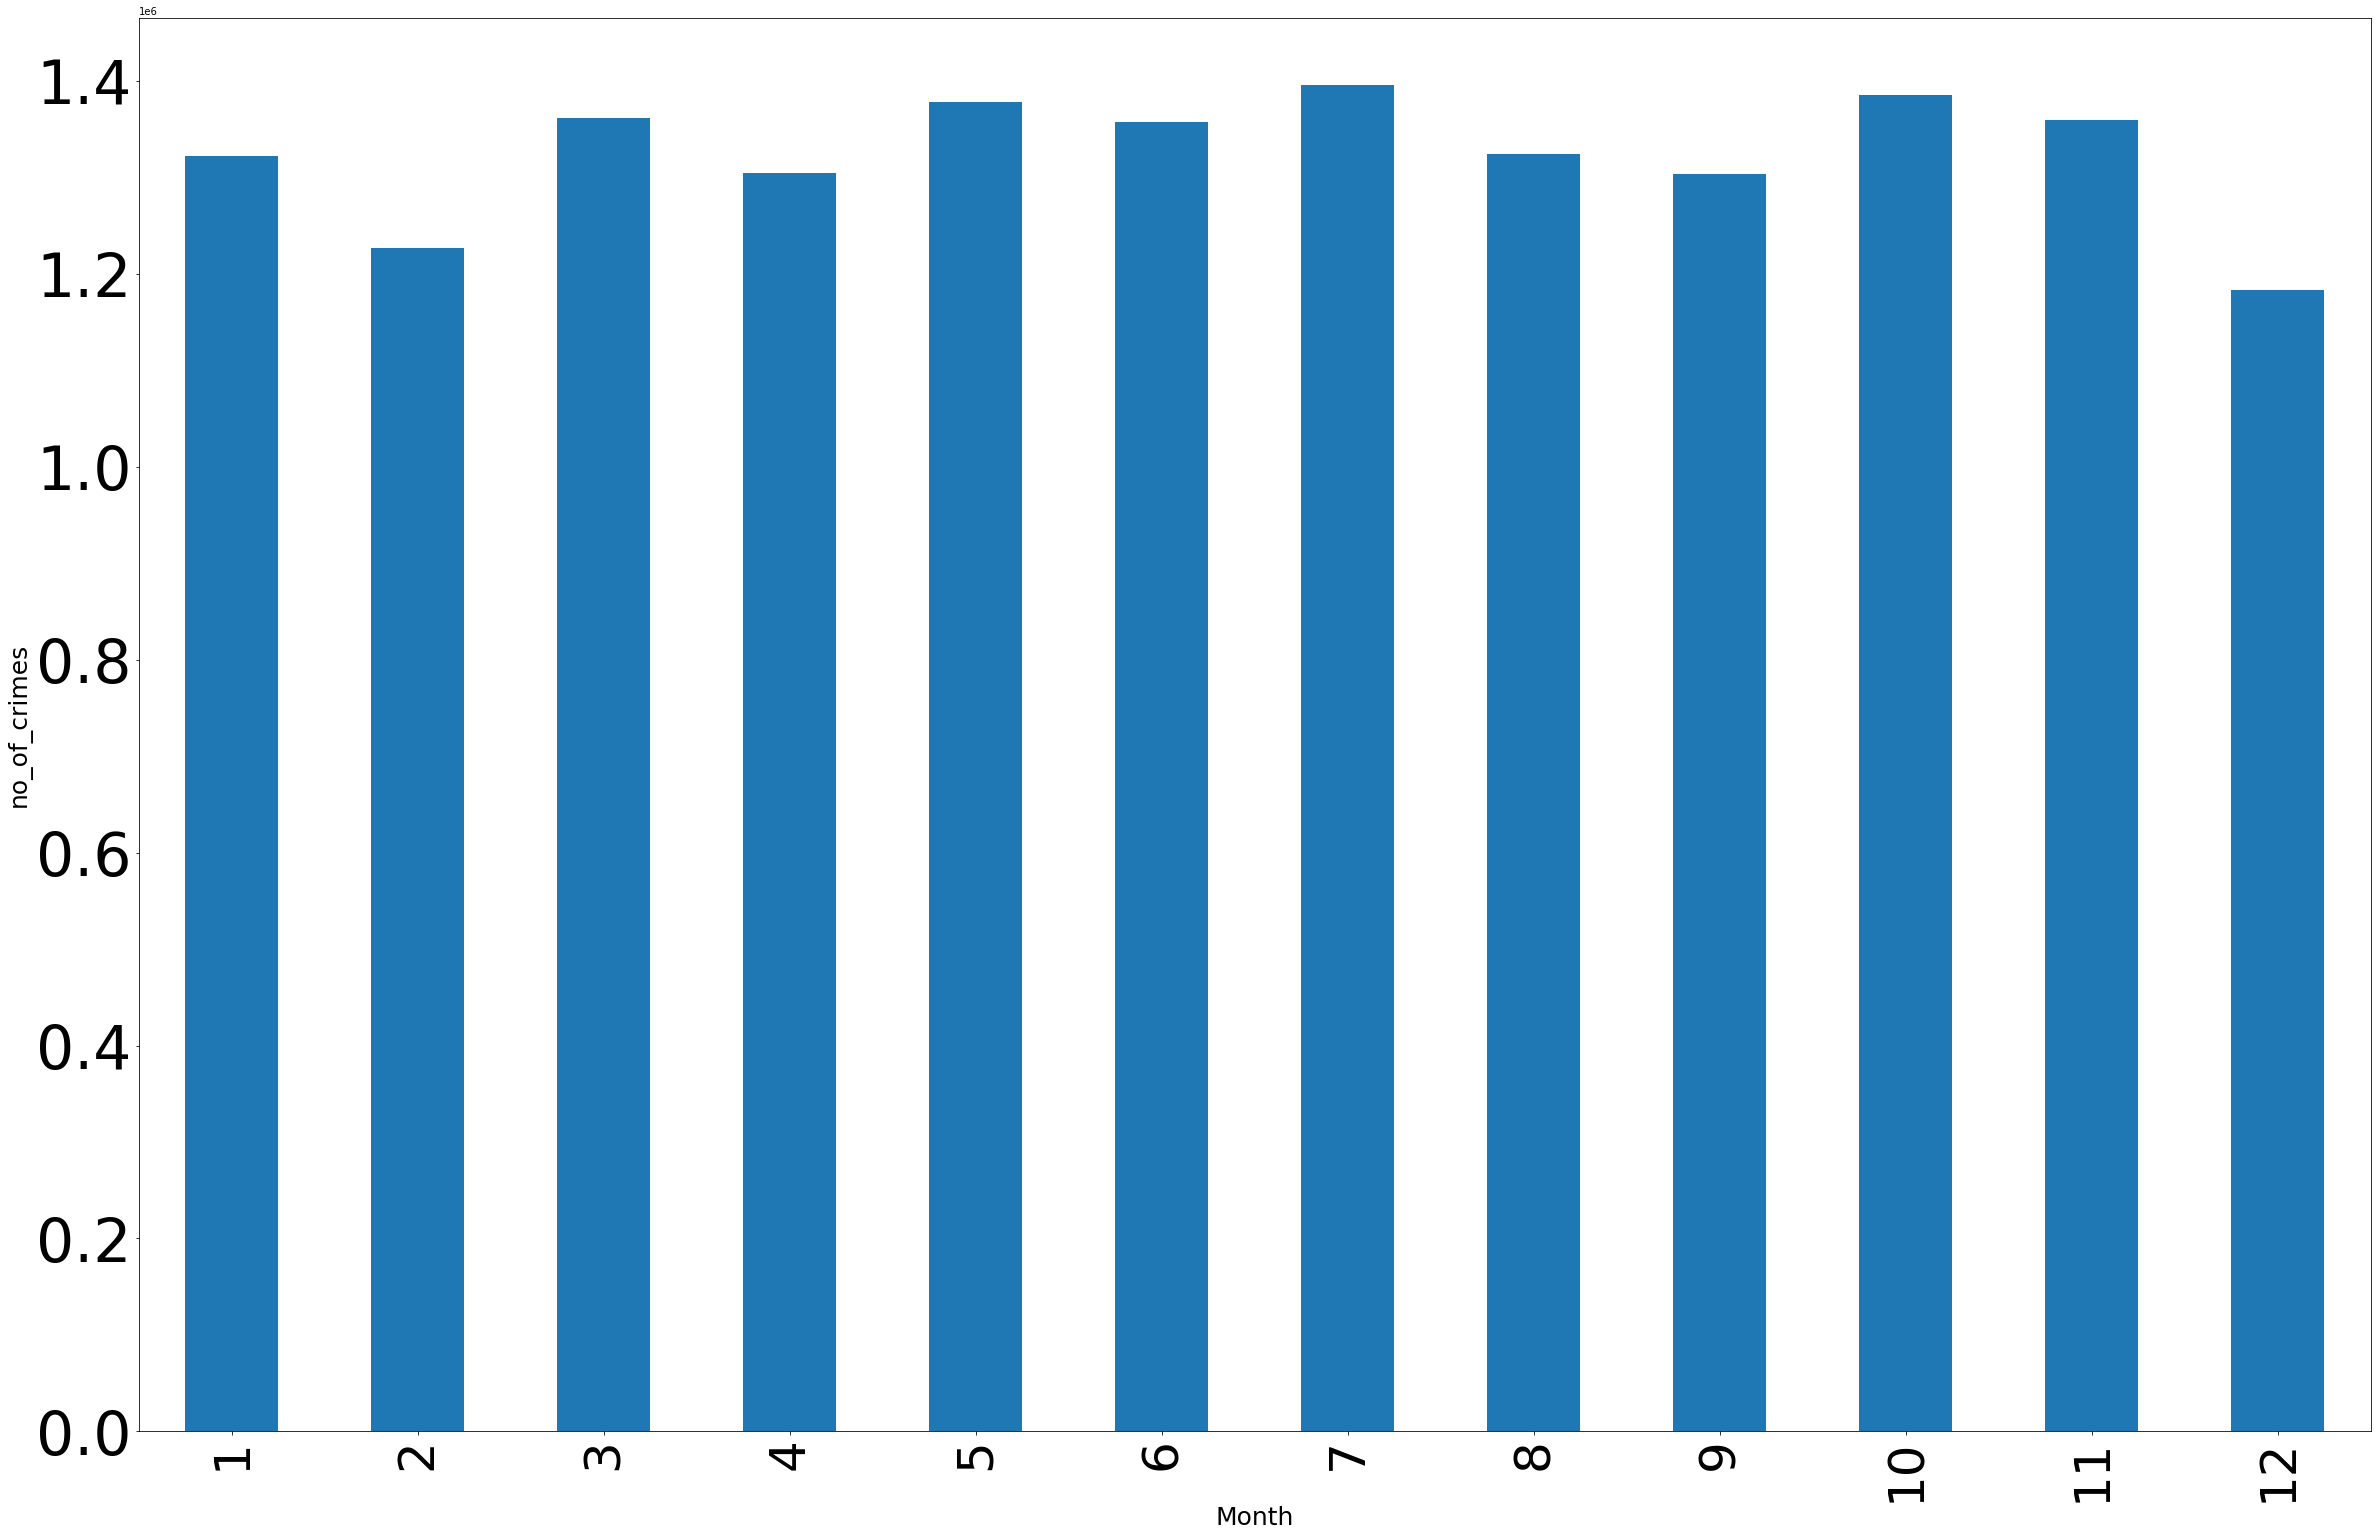

In [57]:
#  Visualisation: (BAR GRAPHES) comparing the number of no_of_crimes	per month 
df.groupby('Month')['no_of_crimes'].sum().plot(kind='bar')

plt.xlabel('Month', fontsize=25)
plt.ylabel('no_of_crimes', fontsize=25)
plt.xticks(size = 50)
plt.yticks(size = 60)
# we see that there is  almost no difference for the registration for the number of crimes per month

As we can see that almost all monthes registrate the same number of crims each month

(array([      0., 1000000., 2000000., 3000000., 4000000., 5000000.,
        6000000.]), <a list of 7 Text major ticklabel objects>)

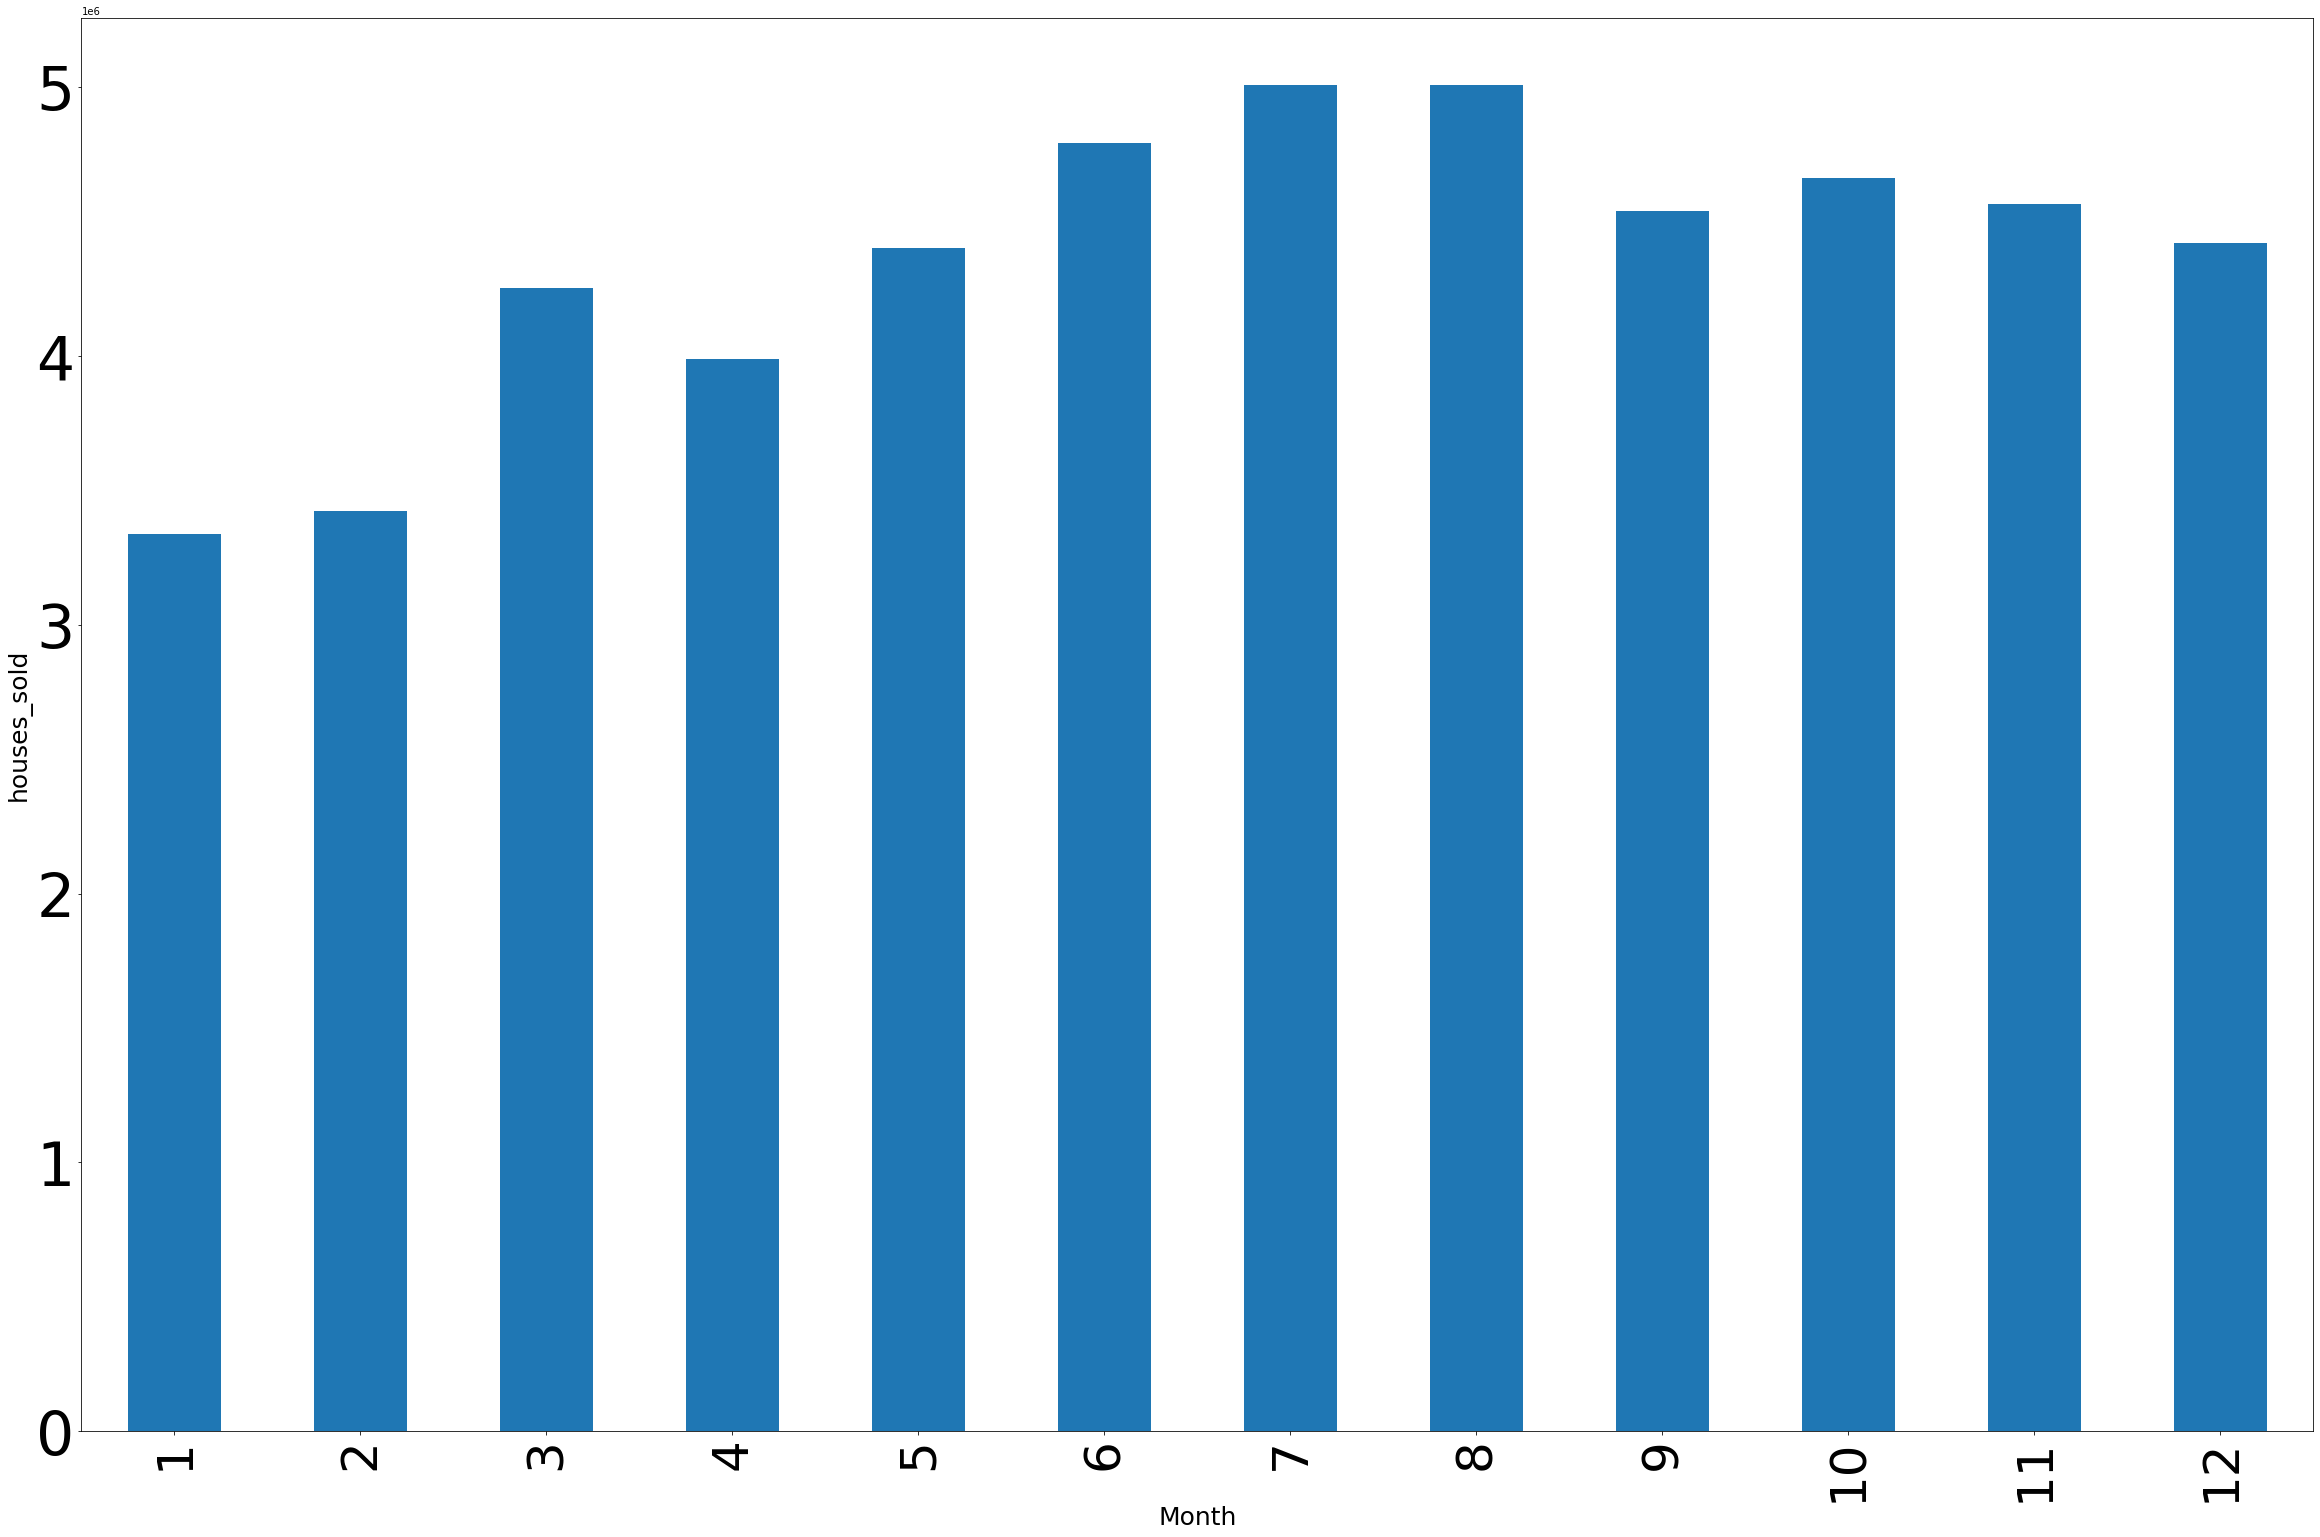

In [58]:
#  Visualisation: (BAR GRAPHES) comparing the number of houses_sold'	per month 


df.groupby('Month')['houses_sold'].sum().plot(kind='bar')
plt.xlabel('Month', fontsize=25)
plt.ylabel('houses_sold', fontsize=25)
plt.xticks(size = 50)
plt.yticks(size = 60)
# we see that houses_sold increases from month 3 to 8 then decrease back

It's more popular to sell/buy houses between the month 03 and 08

General conclusions:

-THe highest prices for housing  is in the area of Kensington and thames, then City of London, Bromley, Hammersmith and Fulham, Islington, Richmond upon thames, Wandsworth and Inner London they took the 2nd place.

-The city that achieved more sales between 1995-2019 is the city of England.

-From 1995 to 2007 the number of houses was increasing then decrease on 2008 (because of the economic crisis) then a slight increase between 2013-2019.

all monthes registrate almost the same number of crims in each month.

- More houses are sold/bought between March and August.

    General recommendations

-place a bet on the ares Kensington and thames, then City of London, Bromley, Hammersmith and Fulham, Islington, Richmond upon thames, Wandsworth and Inner London.

-Buyin houses between October, November, December, January, February. And selling between March and August.